# titanic_data 


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('titanic_data.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,fair,Cabin,Embarked
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   fair         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,fair,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
fair             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
#df['Age'] = df['Age'].fillna(value=df['Age'].median())

In [141]:
df = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   fair      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [143]:
#  Convert ‘Sex’ feature into numeric
#genders = {'male':0,'female':1}
#df['Sex'] = df['Sex'].map(genders)

# Fill Missing Value

In [144]:
from sklearn.impute import SimpleImputer

In [145]:
imputer = SimpleImputer()

In [146]:
#Replacing missing data with the calculated mean value 
df['Age'] = imputer.fit_transform(df[['Age']])

# Encoding Categorical data

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
label = LabelEncoder()

In [149]:
df['Sex'] = label.fit_transform(df['Sex'])

# Feature Scaling

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
std = StandardScaler()

In [152]:
df[['Age','fair']] = std.fit_transform(df[['Age','fair']])

In [153]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,fair
0,0,3,1,-0.592481,1,0,-0.502445
1,1,1,0,0.638789,1,0,0.786845
2,1,3,0,-0.284663,0,0,-0.488854
3,1,1,0,0.407926,1,0,0.420730
4,0,3,1,0.407926,0,0,-0.486337


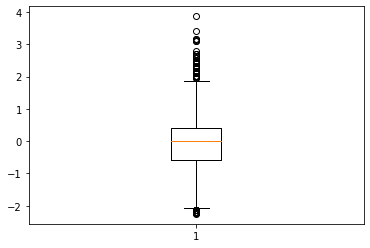

In [154]:
plt.boxplot(df['Age'])
plt.show()

In [155]:
df = df[df['Age']<1.7]

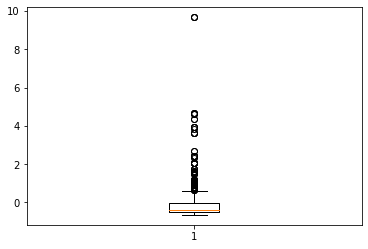

In [156]:
plt.boxplot(df['fair'])
plt.show()

In [157]:
df = df[df['fair']<1]

In [158]:
X = df.drop('Survived',axis=1)

In [159]:
y = df.Survived

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
print("Trainin Data:",model.score(X_train,y_train)*100)
print("Normal Data:",model.score(X,y)*100)
print("Testing Data:",model.score(X_test,y_test)*100)
y_predi = model.predict(X_test)
print("Predicted:",model.score(X_test,y_predi)*100)

Trainin Data: 98.32089552238806
Normal Data: 93.22033898305084
Testing Data: 81.38528138528139
Predicted: 100.0


In [181]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
print("confusion_matrix:")
print(confusion_matrix(y_test,y_predi))
print("classification_report:")
print(classification_report(y_test,y_predi))
print("accuracy_score:")
print(accuracy_score(y_test,y_predi))

confusion_matrix:
[[132  25]
 [ 18  56]]
classification_report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       157
           1       0.69      0.76      0.72        74

    accuracy                           0.81       231
   macro avg       0.79      0.80      0.79       231
weighted avg       0.82      0.81      0.82       231

accuracy_score:
0.8138528138528138


In [182]:
f1_score(y_test,y_predi)*100

72.25806451612902

In [183]:
import pickle

In [184]:
filename = 'DT_model.pickle'
pickle.dump(model, open(filename, 'wb'))